In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Installing pmdarima package
get_ipython().system(' pip install pmdarima')

# Importing auto_arima
from pmdarima.arima import auto_arima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 10.8 MB/s eta 0:00:00


In [3]:
#Reading the sales dataset
sales_data = pd.read_csv("/content/time_series_sales.csv")
sales_data.head()


,Month,Champagne sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


<Axes: xlabel='Month'>

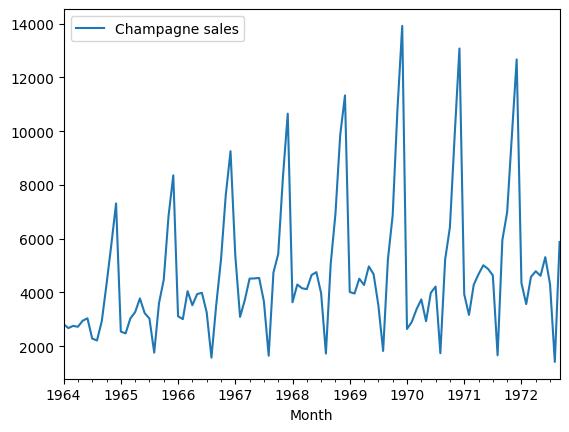

In [5]:
# To understand the pattern
sales_data.plot()

In [7]:
#Testing for stationarity
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(sales_data)

(np.float64(0.01), np.False_)

In [8]:
#Spliting the dataset into train and test
train = sales_data[:85]
test = sales_data[-20:]


In [9]:
train.tail()

,Champagne sales
Month,
1970-09-01,5221
1970-10-01,6424
1970-11-01,9842
1970-12-01,13076
1971-01-01,3934


In [10]:
test.head()

,Champagne sales
Month,
1971-02-01,3162
1971-03-01,4286
1971-04-01,4676
1971-05-01,5010
1971-06-01,4874


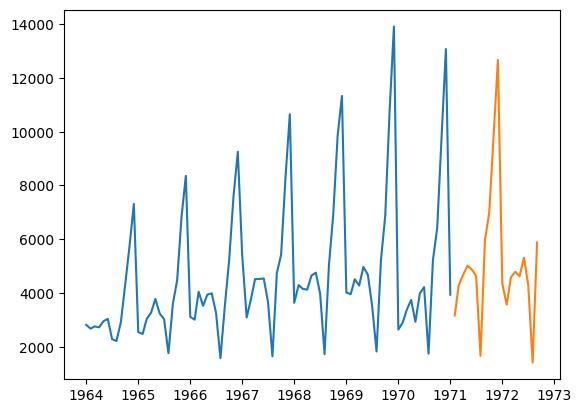

In [11]:
plt.plot(train)
plt.plot(test)

In [12]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0,
                          max_p=5, max_d=5, max_q=5, start_P=0,
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True,
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1203.853, Time=0.23 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1192.025, Time=0.56 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1176.246, Time=0.87 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1174.731, Time=0.29 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1176.034, Time=0.60 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1176.700, Time=2.11 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1175.054, Time=0.87 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1174.769, Time=0.17 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1194.721, Time=0.05 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1174.564, Time=0.48 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=inf, Time=2.37 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=0.99 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1176.889, Time=2.09 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1176.127, Time=1.59 sec
 ARIMA(1,1,3)(0,1,0)[12]     

In [13]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   85
Model:             SARIMAX(1, 1, 2)x(0, 1, [], 12)   Log Likelihood                -583.282
Date:                             Fri, 21 Nov 2025   AIC                           1174.564
Time:                                     13:37:24   BIC                           1183.670
Sample:                                 01-01-1964   HQIC                          1178.189
                                      - 01-01-1971                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8412      0.152     -5.543      0.000      -1.139      -0.544
ma.L1          0.0513      0.167      0.308      0.758      -0.275       0.378
ma.L2         -0.8673      0.086    -10.134      0.000      -1.035      -0.700
sigma2      5.862e+05   7.03e+04      8.342      0.000    4.48e+05    7.24e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 8.55
Prob(Q):                              0.83   Prob(JB):                         0.01
Heteroskedasticity (H):               2.61   Skew:                            -0.10
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 20),index=test.index)
prediction.columns = ['predicted_sales']
prediction

,predicted_sales
Month,
1971-02-01,2746.586306
1971-03-01,3247.982264
1971-04-01,3592.412956
1971-05-01,2800.922049
1971-06-01,3841.828439
1971-07-01,4088.048920
1971-08-01,1596.245337
1971-09-01,5090.015807
1971-10-01,6283.955607


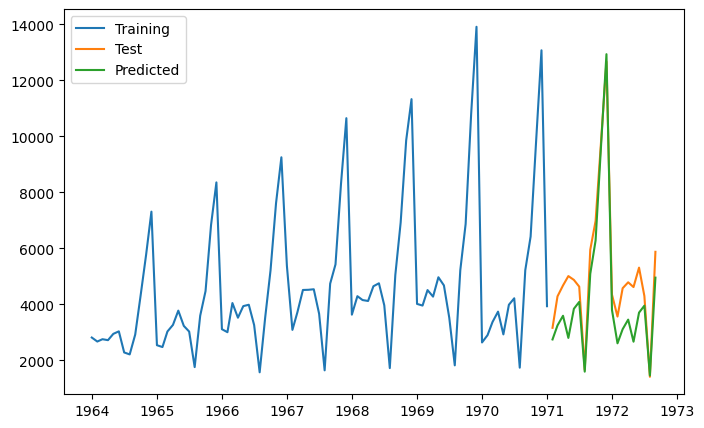

In [17]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc="upper left")
plt.show()

In [18]:
from sklearn.metrics import r2_score
test['predicted_sales'] = prediction
r2_score(test['Champagne sales'], test['predicted_sales'])

0.8114687630945667

**Observations**

- The model was able to capture both trend and seasonality in the data.
- The R² score (0.81) indicates that the forecast fits reasonably well.
- The predicted values follow the overall pattern of the test data, but a few small mismatches are visible.
- As a result, it gave a good performance and can be used for future sales forecasting.
